IMPORTING LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

THE COMPARISM INSTATIATIONS

In [3]:
eps=0 # comparing with epsilon-greedy method
temp=0.1 # comparing with softmax method
flag=0 #

RUNNING THE UCB ALGORITHM AND ITS PLOT DEFINITION

Current value of c :  0
Current value of c :  1
Current value of c :  2


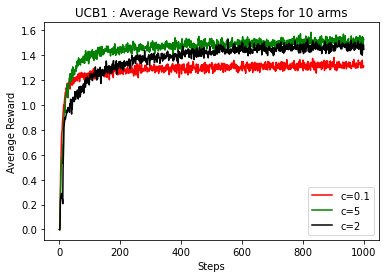

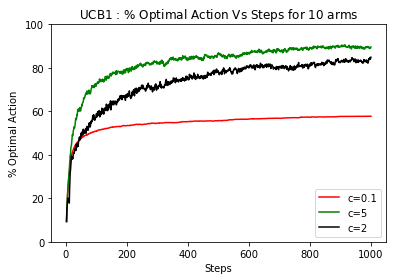

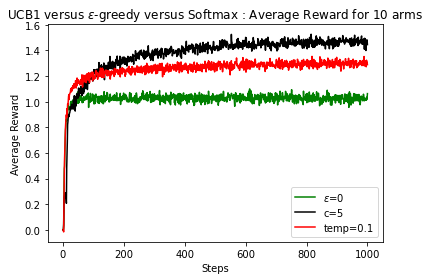

In [4]:
n_bandit = 2000
k = 10
n_pulls=1000 # number of times to pull each arm
c_list=[0.1,2,5] # controls degree of exploration
col=['r','g','k']


fig1=plt.figure().add_subplot(111)
fig2=plt.figure().add_subplot(111)
fig3=plt.figure().add_subplot(111)
q_true=np.random.normal(0,1,(n_bandit,k)) # generating the true means q*(a) for each arm for all bandits
true_opt_arms=np.argmax(q_true,1) # the true optimal arms in each bandit
# each row represents a bandit problem

for c in range(len(c_list)) : 
    print ('Current value of c : ',c)
    
    Q=np.zeros((n_bandit,k)) # reward estimated
    N=np.ones((n_bandit,k)) # number of times each arm was pulled # each arm is pulled atleast once
    
    Q_eps=np.zeros((n_bandit,k)) # reward estimated for epsilon-greedy method
    N_eps=np.ones((n_bandit,k)) # number of times each arm was pulled in epsilon-greedy method 
    
    Q_sfx=np.zeros((n_bandit,k)) # reward estimated for softmax method
    N_sfx=np.ones((n_bandit,k)) # number of times each arm was pulled in softmax method 
    
    # Pull all arms once
    Qi=np.random.normal(q_true,1) # initial pulling of all arms
    avg_Qi=np.mean(Qi)
    
    R_c=[]
    R_c.append(0)
    R_c.append(avg_Qi)
    R_c_opt=[] # to plot % optimal action
    
    
    R_eps=[]
    R_eps.append(0)
    R_eps.append(avg_Qi)
    
    R_sfx=[]
    R_sfx.append(0)
    R_sfx.append(avg_Qi)
    
    for pull in range(2,n_pulls+1) : 
        R_pull=[]
        R_pull_eps=[]
        R_pull_sfx=[]
        opt_arm_pull=0
        
        for i in range(n_bandit) : 

            ucb_Q=Q[i]+np.sqrt(c_list[c]*np.log(pull)/N[i])
            j=np.argmax(ucb_Q)
            if j==true_opt_arms[i] : 
                opt_arm_pull=opt_arm_pull+1

            temp_R=np.random.normal(q_true[i][j],1)
            R_pull.append(temp_R)
            N[i][j]=N[i][j]+1
            Q[i][j]=Q[i][j]+(temp_R-Q[i][j])/N[i][j]


            if flag==2 : 

                # epsilon-greedy
                if random.random()<eps : 
                    j_eps=np.random.randint(k)
                else : 
                    j_eps=np.argmax(Q_eps[i])
                
                
                temp_R_eps=np.random.normal(q_true[i][j_eps],1)
                R_pull_eps.append(temp_R_eps)
                N_eps[i][j_eps]=N_eps[i][j_eps]+1
                Q_eps[i][j_eps]=Q_eps[i][j_eps]+(temp_R_eps-Q_eps[i][j_eps])/N_eps[i][j_eps]

                # softmax
                exp_Q_sfx=np.exp(Q_sfx[i]/temp)
                sfx_Q_sfx=exp_Q_sfx/np.sum(exp_Q_sfx) # softmax probabilities
                j_sfx=np.random.choice(range(k),1,p=sfx_Q_sfx) # picks one arm based on softmax probability
                temp_R_sfx=np.random.normal(q_true[i][j_sfx],1)
                N_sfx[i][j_sfx]=N_sfx[i][j_sfx]+1
                Q_sfx[i][j_sfx]=Q_sfx[i][j_sfx]+(temp_R_sfx-Q_sfx[i][j_sfx])/N_sfx[i][j_sfx]
                R_pull_sfx.append(temp_R_sfx)
                
        avg_R_pull=np.mean(R_pull)
                
        if flag==2 :
            avg_R_pull_eps=np.mean(R_pull_eps)
            R_eps.append(avg_R_pull_eps)
            avg_R_pull_sfx=np.mean(R_pull_sfx)
            R_sfx.append(avg_R_pull_sfx)

        R_c.append(avg_R_pull)
        R_c_opt.append(float(opt_arm_pull)*100/2000)
        
    fig1.plot(range(0,n_pulls+1),R_c,col[c])
    fig2.plot(range(2,n_pulls+1),R_c_opt,col[c])


    if flag==2 : 
        fig3.plot(range(0,n_pulls+1),R_eps,'g')
        fig3.plot(range(0,n_pulls+1),R_c,'k')
        fig3.plot(range(0,n_pulls+1),R_sfx,'r')	
    flag=flag+1
    
plt.rc('text',usetex=False)

fig1.title.set_text('UCB1 : Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig1.legend((r"c=0.1",r"c=5",r"c=2"),loc='best')

fig2.title.set_text(r'UCB1 : $\%$ Optimal Action Vs Steps for 10 arms')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend((r"c=0.1",r"c=5",r"c=2"),loc='best')

fig3.title.set_text(r'UCB1 versus $\epsilon$-greedy versus Softmax : Average Reward for 10 arms')
fig3.set_ylabel('Average Reward')
fig3.set_xlabel('Steps')
fig3.legend((r"$\epsilon$="+str(eps),r"c="+str(c_list[2]),r"temp="+str(temp)),loc='best')
plt.show()







    
    

    
